<a href="https://colab.research.google.com/github/AfredTX/MarchMadnessBracketAssistant/blob/master/March_Madness_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook I will walk you through the process in which I scraped statistics from Fox Sports, team rankings and logos from CBS Sports, and ran statistical analyses to determine the significance of success metrics with a data set found on Kaggle at: https://www.kaggle.com/ncaa/ncaa-basketball**



In [0]:
#Get it Together!
!pip install --upgrade --quiet gspread

from google.colab import auth
auth.authenticate_user()

import gspread

from oauth2client.client import GoogleCredentials

from IPython.display import display
gc = gspread.authorize(GoogleCredentials.get_application_default())

import pandas as pd

import matplotlib.pyplot as plt

import requests

from bs4 import BeautifulSoup

from openpyxl import load_workbook
from scipy import stats
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


After importing all of the necessary tools for my webscraping project and my statistic analyses, I created a Google Sheets Workbook and corresponding worksheets where I would later write data.


In [0]:
#Create A Workbook!

#wb = gc.create('March Madness')
sh = gc.open('March Madness')
#Create The Sheets!

#create_sheet = sh.add_worksheet(title='Scoring', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Rebounding', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Shooting', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Assists', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Defense', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Misc', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Advanced', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Rankings', rows='100', cols='20')
#create_sheet = sh.add_worksheet(title='Logos', rows='100', cols='20')

Once I had the workbook designed perfectly for my purposes I created a function that would strip data from Fox Sports and write data in it's corresponding sheet within the workbook.

In [0]:
#Build Function to Strip Stats and Write To Worksheets
def strip_and_write(cat):
  if cat == 'Scoring':
    url_p1 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&time=0&team=1'
    sheet = sh.worksheet('Scoring')
    cell_list = sheet.range('A1:M1')
    cell_list2 = sheet.range('A2:M51')
    url_p2 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=2'
    cell_list3 = sheet.range('A52:M101')
    url_p3 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=3'
    cell_list4 = sheet.range('A102:M151')
    url_p4 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=4'
    cell_list5 = sheet.range('A152:M201')
    url_p5 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=5'
    cell_list6 = sheet.range('A202:M251')
    url_p6 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=6'
    cell_list7 = sheet.range('A252:M301')
    url_p7 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=7'
    cell_list8 = sheet.range('A302:M351')
    url_p8 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SCORING&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=8'
    cell_list9 = sheet.range('A352:M401')
  elif cat == 'Rebounding':
    url_p1 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&time=0&team=1'
    sheet = sh.worksheet('Rebounding')
    cell_list = sheet.range('A1:O1')
    cell_list2 = sheet.range('A2:O51')
    url_p2 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=2'
    cell_list3 = sheet.range('A52:O101')
    url_p3 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=3'
    cell_list4 = sheet.range('A102:O151')
    url_p4 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=4'
    cell_list5 = sheet.range('A152:O201')
    url_p5 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=5'
    cell_list6 = sheet.range('A202:O251')
    url_p6 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=6'
    cell_list7 = sheet.range('A252:O301')
    url_p7 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=7'
    cell_list8 = sheet.range('A302:O351')
    url_p8 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=REBOUNDING&group=2&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=8'
    cell_list9 = sheet.range('A352:O401')
  elif cat == 'Shooting':
    url_p1 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&time=0&team=1'
    sheet = sh.worksheet('Shooting')
    cell_list = sheet.range('A1:U1')
    cell_list2 = sheet.range('A2:U51')
    url_p2 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=2'
    cell_list3 = sheet.range('A52:U101')
    url_p3 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=3'
    cell_list4 = sheet.range('A102:U151')
    url_p4 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=4'
    cell_list5 = sheet.range('A152:U201')
    url_p5 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=5'
    cell_list6 = sheet.range('A202:U251')
    url_p6 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=6'
    cell_list7 = sheet.range('A252:U301')
    url_p7 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=7'
    cell_list8 = sheet.range('A302:U351')
    url_p8 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=SHOOTING&group=2&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=8'
    cell_list9 = sheet.range('A352:U401')
  elif cat == 'Defense':
    url_p1 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&time=0&team=1'
    sheet = sh.worksheet('Defense')
    cell_list = sheet.range('A1:L1')
    cell_list2 = sheet.range('A2:L51')
    url_p2 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=2'
    cell_list3 = sheet.range('A52:L101')
    url_p3 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=3'
    cell_list4 = sheet.range('A102:L151')
    url_p4 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=4'
    cell_list5 = sheet.range('A152:L201')
    url_p5 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=5'
    cell_list6 = sheet.range('A202:L251')
    url_p6 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=6'
    cell_list7 = sheet.range('A252:L301')
    url_p7 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=7'
    cell_list8 = sheet.range('A302:L351')
    url_p8 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=DEFENSE&group=2&sort=1&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=8'
    cell_list9 = sheet.range('A352:L401')
  elif cat == 'Assists':
    url_p1 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&time=0&team=1'
    sheet = sh.worksheet('Assists')
    cell_list = sheet.range('A1:K1')
    cell_list2 = sheet.range('A2:K51')
    url_p2 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=2'
    cell_list3 = sheet.range('A52:K101')
    url_p3 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=3'
    cell_list4 = sheet.range('A102:K151')
    url_p4 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=4'
    cell_list5 = sheet.range('A152:K201')
    url_p5 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=5'
    cell_list6 = sheet.range('A202:K251')
    url_p6 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=6'
    cell_list7 = sheet.range('A252:K301')
    url_p7 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=7'
    cell_list8 = sheet.range('A302:K351')
    url_p8 = 'https://www.foxsports.com/college-basketball/team-stats?season=2019&category=ASSISTS&group=2&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0&page=8'
    cell_list9 = sheet.range('A352:K401')
  else:
    return 'Category Not Recognized'


  #access url
  response1 = requests.get(url_p1)
  if(response1.ok):
    data1 = response1.text
  soup = BeautifulSoup(data1, 'html.parser')

  #create stats headers
  raw_stat_cats = soup.find_all(class_='sorter-digit')
  stat_cats = [stat.get_text() for stat in raw_stat_cats]
  just_cats = [stat[1:-1] for stat in stat_cats]
  headers = ['Team'] + just_cats

  #write headers to worksheet
  for i, val in enumerate(headers):
    cell_list[i].value = val
  sheet.update_cells(cell_list)

  #create data list
  stat_figs_p1 = soup.find_all(class_= 'wisbb_fvStand')
  just_stats_p1 = [stat.get_text() for stat in stat_figs_p1]
  raw_figs_p1 = [stat.split('\n') for stat in just_stats_p1]
  cooked_figs_p1 = [stat[6:] for stat in raw_figs_p1]
  figs_p1 = [list(filter(None, stat)) for stat in cooked_figs_p1]
  final_figs_p1 = figs_p1[1:]
  stat_list_p1 = [j for i in final_figs_p1 for j in i]

  #write list into sheet
  for i, val in enumerate(stat_list_p1):
    cell_list2[i].value = val
  sheet.update_cells(cell_list2)

  #repeat process for second stat page 2
  response2 = requests.get(url_p2)
  if(response2.ok):
    data2 = response2.text
  soup2 =BeautifulSoup(data2, 'html.parser')

  stat_figs_p2 = soup2.find_all(class_= 'wisbb_fvStand')
  just_stats_p2 = [stat.get_text() for stat in stat_figs_p2]
  raw_figs_p2 = [stat.split('\n') for stat in just_stats_p2]
  cooked_figs_p2 = [stat[5:] for stat in raw_figs_p2]
  figs_p2 = [list(filter(None, stat)) for stat in cooked_figs_p2]
  final_figs_p2 = figs_p2[1:]
  stat_list_p2 = [j for i in final_figs_p2 for j in i]

  for i, val in enumerate(stat_list_p2):
    cell_list3[i].value = val
  sheet.update_cells(cell_list3)

#p3
  response3 = requests.get(url_p3)
  if(response3.ok):
    data3 = response3.text
  soup3 =BeautifulSoup(data3, 'html.parser')

  stat_figs_p3 = soup3.find_all(class_= 'wisbb_fvStand')
  just_stats_p3 = [stat.get_text() for stat in stat_figs_p3]
  raw_figs_p3 = [stat.split('\n') for stat in just_stats_p3]
  cooked_figs_p3 = [stat[5:] for stat in raw_figs_p3]
  figs_p3 = [list(filter(None, stat)) for stat in cooked_figs_p3]
  final_figs_p3 = figs_p3[1:]
  stat_list_p3 = [j for i in final_figs_p3 for j in i]

  for i, val in enumerate(stat_list_p3):
    cell_list4[i].value = val
  sheet.update_cells(cell_list4)

  #p4
  response4 = requests.get(url_p4)
  if(response4.ok):
    data4 = response4.text
  soup4 =BeautifulSoup(data4, 'html.parser')

  stat_figs_p4 = soup4.find_all(class_= 'wisbb_fvStand')
  just_stats_p4 = [stat.get_text() for stat in stat_figs_p4]
  raw_figs_p4 = [stat.split('\n') for stat in just_stats_p4]
  cooked_figs_p4 = [stat[5:] for stat in raw_figs_p4]
  figs_p4 = [list(filter(None, stat)) for stat in cooked_figs_p4]
  final_figs_p4 = figs_p4[1:]
  stat_list_p4 = [j for i in final_figs_p4 for j in i]

  for i, val in enumerate(stat_list_p4):
    cell_list5[i].value = val
  sheet.update_cells(cell_list5)

  #p5
  response5 = requests.get(url_p5)
  if(response5.ok):
    data5 = response5.text
  soup5 =BeautifulSoup(data5, 'html.parser')

  stat_figs_p5 = soup5.find_all(class_= 'wisbb_fvStand')
  just_stats_p5 = [stat.get_text() for stat in stat_figs_p5]
  raw_figs_p5 = [stat.split('\n') for stat in just_stats_p5]
  cooked_figs_p5 = [stat[5:] for stat in raw_figs_p5]
  figs_p5 = [list(filter(None, stat)) for stat in cooked_figs_p5]
  final_figs_p5 = figs_p5[1:]
  stat_list_p5 = [j for i in final_figs_p5 for j in i]

  for i, val in enumerate(stat_list_p5):
    cell_list6[i].value = val
  sheet.update_cells(cell_list6)

  #p6
  response6 = requests.get(url_p6)
  if(response6.ok):
    data6 = response6.text
  soup6 =BeautifulSoup(data6, 'html.parser')

  stat_figs_p6 = soup6.find_all(class_= 'wisbb_fvStand')
  just_stats_p6 = [stat.get_text() for stat in stat_figs_p6]
  raw_figs_p6 = [stat.split('\n') for stat in just_stats_p6]
  cooked_figs_p6 = [stat[5:] for stat in raw_figs_p6]
  figs_p6 = [list(filter(None, stat)) for stat in cooked_figs_p6]
  final_figs_p6 = figs_p6[1:]
  stat_list_p6 = [j for i in final_figs_p6 for j in i]

  for i, val in enumerate(stat_list_p6):
    cell_list7[i].value = val
  sheet.update_cells(cell_list7)

  #p7
  response7 = requests.get(url_p7)
  if(response7.ok):
    data7 = response7.text
  soup7 =BeautifulSoup(data7, 'html.parser')

  stat_figs_p7 = soup7.find_all(class_= 'wisbb_fvStand')
  just_stats_p7 = [stat.get_text() for stat in stat_figs_p7]
  raw_figs_p7 = [stat.split('\n') for stat in just_stats_p7]
  cooked_figs_p7 = [stat[5:] for stat in raw_figs_p7]
  figs_p7 = [list(filter(None, stat)) for stat in cooked_figs_p7]
  final_figs_p7 = figs_p7[1:]
  stat_list_p7 = [j for i in final_figs_p7 for j in i]

  for i, val in enumerate(stat_list_p7):
    cell_list8[i].value = val
  sheet.update_cells(cell_list8)

  #p8
  response8 = requests.get(url_p8)
  if(response8.ok):
    data8 = response8.text
  soup8 =BeautifulSoup(data8, 'html.parser')

  stat_figs_p8 = soup8.find_all(class_= 'wisbb_fvStand')
  just_stats_p8 = [stat.get_text() for stat in stat_figs_p8]
  raw_figs_p8 = [stat.split('\n') for stat in just_stats_p8]
  cooked_figs_p8 = [stat[5:] for stat in raw_figs_p8]
  figs_p8 = [list(filter(None, stat)) for stat in cooked_figs_p8]
  final_figs_p8 = figs_p8[1:]
  stat_list_p8 = [j for i in final_figs_p8 for j in i]

  for i, val in enumerate(stat_list_p8):
    cell_list9[i].value = val
  sheet.update_cells(cell_list9)

With an effective function written, I can now easily create a single cell the updates the stats in my workbook upon being run.

In [0]:
# write updated stat into spreadsheets
strip_and_write('Scoring')
strip_and_write('Rebounding')
strip_and_write('Shooting')
strip_and_write('Defense')
strip_and_write('Assists')


Next, for asthetic and organizational purposes of my dashboard, I began the process of writing a list of the top 68 NCAA teams and a list of url's to their corresponding team logos. Since the rank and logos are from a different web source than the data that will be used to compare each team, I needed to observe which team names needed to be edited and created a function to swap team names that did not match between the two data sets.


In [0]:
#Get Ranked List With Logos
logo_ranks_url = 'https://www.cbssports.com/college-basketball/bracketology/'
logo_response = requests.get(logo_ranks_url)
if(logo_response.ok):
  logo_data = logo_response.text
logo_soup = BeautifulSoup(logo_data, 'html.parser')
#write team names and logo urls into lists
raw_logo_data = logo_soup.find_all(class_='table-base has-border-full has-row-span-hover has-cell-padding-default')
logos = logo_soup.findAll('a', {'om-event':True})
names_text = [i.get_text() for i in logos]
names_text = [stat.split('\n') for stat in names_text]
names_text = [list(filter(None, stat)) for stat in names_text]
names_text = [j for i in names_text for j in i]
names_text = names_text[9:]

logos_list = []
print(names_text)
for item in logos:
  item1 = item.find_all('figure')
  for subitem in item1:
    logos_list.append(subitem.find('img')['data-lazy'].strip())
logos_list = logos_list[9:]

#make team names match the rest of sheet
def swap(old_team, new_team):
  i = names_text.index(old_team)
  names_text.remove(old_team)
  names_text.insert(i, new_team)

swap('Florida St.', 'FSU')
swap('San Diego St', 'San Diego State')
swap('Michigan St.', 'Michigan State')
swap('Ohio St.', 'Ohio')
swap('Penn St.', 'Penn State')
swap('W. Virginia', 'West Virginia')
swap('Virginia', 'UVA')
swap('Arizona St.', 'Arizona State')
swap('Utah St.', 'Utah State')
swap('Wichita St.', 'Wichita State')
swap('ETSU', 'E Tennessee State')
swap('SF Austin', 'Stephen F Austin')
swap('N. Mex. St.', 'NMSU')
swap('E. Washington', 'E Washington')
swap('NC Central', 'N Carolina Cent')
swap('N. Dak. St.', 'North Dakota St')
swap('Prairie View','PV')
swap('NC State', 'North Carolina St')
swap('Miss. State', 'MSST')

#write lists into sheet

logo_sheet = sh.worksheet('Logos')
cell_list7 = logo_sheet.range('A1:A100')
cell_list8 = logo_sheet.range('B1:B100')

for i, val in enumerate(names_text):
  cell_list7[i].value = val
logo_sheet.update_cells(cell_list7)

for i, val in enumerate(logos_list):
  cell_list8[i].value = val
logo_sheet.update_cells(cell_list8)


  




['Dayton', 'Kansas', 'Baylor', 'Gonzaga', 'Villanova', 'Creighton', 'Florida St.', 'San Diego St', 'Michigan St.', 'Duke', 'Maryland', 'Seton Hall', 'Louisville', 'Kentucky', 'Butler', 'Oregon', 'Auburn', 'Wisconsin', 'Ohio St.', 'Penn St.', 'W. Virginia', 'Illinois', 'Virginia', 'BYU', 'USC', 'Michigan', 'Providence', 'Iowa', 'Colorado', "Saint Mary's", 'Arizona St.', 'Houston', 'Florida', 'Arizona', 'Marquette', 'Oklahoma', 'Indiana', 'Utah St.', 'LSU', 'Xavier', 'Cincinnati', 'Richmond', 'Wichita St.', 'Stanford', 'Rutgers', 'UCLA', 'Akron', 'ETSU', 'Yale', 'SF Austin', 'Liberty', 'Vermont', 'Bradley', 'N. Mex. St.', 'North Texas', 'Little Rock', 'UC Irvine', 'Hofstra', 'Colgate', 'Belmont', 'N. Dak. St.', 'E. Washington', 'N. Kentucky', 'NC Central', 'Robert Morris', 'Winthrop', 'Siena', 'Prairie View', 'Texas Tech', 'Miss. State', 'NC State', 'Texas', 'Indiana', 'Xavier', 'Cincinnati', 'ETSU', 'Miss. State', 'NC State', 'Northern Iowa', 'Richmond', 'Rutgers', 'Stanford', 'Texas', 

{'spreadsheetId': '1Uq_yhxnmoOm-hPbi4MO0e5rAKNTVx_Ao_NfEmPFzebk',
 'updatedCells': 100,
 'updatedColumns': 1,
 'updatedRange': 'Logos!B1:B100',
 'updatedRows': 100}

With my scraped data set complete written safely into a google sheet, I begn to develop my hypothesis for my statistical analysis. At the outset of my project I hypothesized that the ['Four Factors'](https://www.basketball-reference.com/about/factors.html) would each have a notable correlation with wins and the highest correlation to wins in the 19-20 college basketball season of all advanced stats. I looked to test this hypothesis using an advanced stats data set found on [Kaggle](https://www.kaggle.com/ncaa/ncaa-basketball).



In [0]:

#Get worksheet data into Data Frame
wks = gc.open("Kaggle NCAA 19 Data").sheet1
data = wks.get_all_values()
headers = data.pop(0)
df = pd.DataFrame(data, columns=headers)
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

             TEAM CONF   G   W  ADJOE  ...  3P_D ADJ_T   WAB POSTSEASON SEED
0         Gonzaga  WCC  37  33  123.4  ...  30.4    72     7         E8    1
1        Virginia  ACC  38  35    123  ...  28.9  60.7  11.1  Champions    1
2            Duke  ACC  38  32  118.9  ...  29.9  73.6  11.2         E8    1
3  North Carolina  ACC  36  29  120.1  ...  33.5    76    10        S16    1
4        Michigan  B10  37  30  114.6  ...  29.1  65.9   9.2        S16    2

[5 rows x 23 columns]
(353, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null object
W             353 non-null object
ADJOE         353 non-null object
ADJDE         353 non-null object
BARTHAG       353 non-null object
EFG_O         353 non-null object
EFG_D         353 non-null object
TOR           353 non-null object
TORD          353 non-null object
ORB           353 non-null

After getting a better idea of the amount of information supplied by the data set I tested my first hypothesis: each of the four factors had a distinct correlation to wins in the 19-20 college basketball season.


In [0]:
print('Pearson Correlation Coefficient between EFG_O and W is:')
print(df['W'].astype(float).corr(df['EFG_O'].astype(float)))
print('Pearson Correlation Coefficient between EFG_D and W is:')
print(df['W'].astype(float).corr(df['EFG_D'].astype(float)))
print('Pearson Correlation Coefficient between TOR and W is:')
print(df['W'].astype(float).corr(df['TOR'].astype(float)))
print('Pearson Correlation Coefficient between ORB and W is:')
print(df['W'].astype(float).corr(df['ORB'].astype(float)))
print('Pearson Correlation Coefficient between DRB and W is:')
print(df['W'].astype(float).corr(df['DRB'].astype(float)))
print('Pearson Correlation Coefficient between FTR and W is:')

print(df['W'].astype(float).corr(df['FTR'].astype(float)))

Pearson Correlation Coefficient between EFG_O and W is:
0.5875499187376069
Pearson Correlation Coefficient between EFG_D and W is:
-0.6475086876913545
Pearson Correlation Coefficient between TOR and W is:
-0.45730937686468215
Pearson Correlation Coefficient between ORB and W is:
0.31970583981348777
Pearson Correlation Coefficient between DRB and W is:
-0.29189457225189114
Pearson Correlation Coefficient between FTR and W is:
0.150735485732343


Judging from the Pearson Correlation Coefficient of each advanced statistic, we can see that each factor has a varying degree of correlation to wins, some positive, some negative. But can we trust these indicators to be significant?

In [0]:
print('The statistical signigicance of the correlation between W and EFG_O is:')
print(stats.pearsonr(df['W'].astype(float), df['EFG_O'].astype(float)))
print('The statistical signigicance of the correlation between W and EFG_D is:')
print(stats.pearsonr(df['W'].astype(float), df['EFG_D'].astype(float)))
print('The statistical signigicance of the correlation between W and TOR is:')
print(stats.pearsonr(df['W'].astype(float), df['TOR'].astype(float)))
print('The statistical signigicance of the correlation between W and ORB is:')
print(stats.pearsonr(df['W'].astype(float), df['ORB'].astype(float)))
print('The statistical signigicance of the correlation between W and DRB is:')
print(stats.pearsonr(df['W'].astype(float), df['DRB'].astype(float)))
print('The statistical signigicance of the correlation between W and FTR is:')
print(stats.pearsonr(df['W'].astype(float), df['FTR'].astype(float)))

The statistical signigicance of the correlation between W and EFG_O is:
(0.5875499187376072, 3.8279452412213556e-34)
The statistical signigicance of the correlation between W and EFG_D is:
(-0.647508687691355, 2.4765937130012632e-43)
The statistical signigicance of the correlation between W and TOR is:
(-0.45730937686468226, 1.2064178672745367e-19)
The statistical signigicance of the correlation between W and ORB is:
(0.31970583981348805, 7.871087405200079e-10)
The statistical signigicance of the correlation between W and DRB is:
(-0.2918945722518915, 2.311817560532508e-08)
The statistical signigicance of the correlation between W and FTR is:
(0.15073548573234302, 0.004536137519544417)


In the case of each factor p<.05, indicating the significance of each statistic's correlation to wins.

In [0]:
print('EFG_D has the strongest correlation to W. The correlation is negative.')
print('EFG_O has the next strongest correlation to W. The correlation is positive.')
print('TOR has a notable negative correlation to W')
print('ORB has a fair, positive correlation to W')
print('DRB has a smaller, negative correlation to W')
print('FTR has the smallest correlation to W. The correlation is positive.')
print( 'All correlations are likely significant as all p values < .05')

EFG_D has the strongest correlation to W. The correlation is negative.
EFG_O has the next strongest correlation to W. The correlation is positive.
TOR has a notable negative correlation to W
ORB has a fair, positive correlation to W
DRB has a smaller, negative correlation to W
FTR has the smallest correlation to W. The correlation is positive.
All correlations are likely significant as all p values < .05


We fail to reject our first hypothesis that the four factors are indeed indicators of success for the 19-20 NCAA basketball season. Now it is time to test our second hypothesis that the four factors have a greater significant correlation to wins than other advanced stats. In this case, I used offensive and defensive three point shooting percentages to test this hypothesis.

In [0]:
print('The statistical signigicance of the correlation between W and 3P_O is:')
print(stats.pearsonr(df['W'].astype(float), df['3P_O'].astype(float)))
print('The statistical signigicance of the correlation between W and 3P_D is:')
print(stats.pearsonr(df['W'].astype(float), df['3P_D'].astype(float)))

The statistical signigicance of the correlation between W and 3P_O is:
(0.36089931577476475, 2.676710237948717e-12)
The statistical signigicance of the correlation between W and 3P_D is:
(-0.5113619677733519, 6.505426035423296e-25)


Observing the Pearson Correlation Coefficient and the p value for these two new factors we can assert that the two three point shooting stats have a higher significant correlation with success than some of the metrics in the "Four Factors"

In [0]:
print('In this season of basketball 3P_D had a very high negative correlation to W and 3P_O had a fair positive correlation')
print('Both correlations are significant as p <.05')

In this season of basketball 3P_D had a very high negative correlation to W and 3P_O had a fair positive correlation
Both correlations are significant as p <.05


With this test, we reject the hypothesis that the four factors are the strongest indicators of success among advanced stats. Using the correlation coefficients of each advanced statistic we can give each statistic a weight based on the strength of its correlation to winning in the 19-20 NCAA season.

In [0]:
print('The Four Factors are traditionally assigned these weights:')
print('Shooting (40%)') 
print('Turnovers (25%)')
print('Rebounding (20%)')
print('Free Throws (15%)')
print('')
print('Based on the Pearson Correlation Coefficient, we will ')
print('assign a new weight that indicates the correlation to ')
print('success of each category:')
print('EFG_D (20%)')
print('EFG_O (18%)')
print('3P_D (16%)')
print('TOR (14%)')
print('3P_D (11%)')
print('ORB (9%)')
print('DRB (8%)')
print('FTR (4%)')

The Four Factors are traditionally assigned these weights:
Shooting (40%)
Turnovers (25%)
Rebounding (20%)
Free Throws (15%)

Based on the Pearson Correlation Coefficient, we will 
assign a new weight that indicates the correlation to 
success of each category:
EFG_D (20%)
EFG_O (18%)
3P_D (16%)
TOR (14%)
3P_D (11%)
ORB (9%)
DRB (8%)
FTR (4%)


The weights for each statistic will be used in our dashboard to measure each team's performance in metrics correlated with success.

Now that we have determined the factors that we will use to compare teams in the March Madness bracket, lets do some exploratory data analysis into the data set that we have created with the [data scraped from Fox Sports](https://docs.google.com/spreadsheets/d/1Uq_yhxnmoOm-hPbi4MO0e5rAKNTVx_Ao_NfEmPFzebk/edit?usp=sharing).

In [0]:
# Get worksheet data into dataframes
scoring_sheet = sh.worksheet('Scoring')
rebounding_sheet = sh.worksheet('Rebounding')
shooting_sheet = sh.worksheet('Shooting')
defense_sheet = sh.worksheet('Defense')
assists_sheet = sh.worksheet('Assists')

scoring_data = scoring_sheet.get_all_values()
scoring_headers = scoring_data.pop(0)
scoring_df = pd.DataFrame(scoring_data, columns=scoring_headers)
print('Scoring info')
print(scoring_df.info())

rebounding_data = rebounding_sheet.get_all_values()
rebounding_headers = rebounding_data.pop(0)
rebounding_df = pd.DataFrame(rebounding_data, columns=rebounding_headers)
print('Rebounding info')
print(rebounding_df.info())

shooting_data = shooting_sheet.get_all_values()
shooting_headers = shooting_data.pop(0)
shooting_df = pd.DataFrame(shooting_data, columns=shooting_headers)
print('Shooting info')
print(shooting_df.info())

defense_data = defense_sheet.get_all_values()
defense_headers = defense_data.pop(0)
defense_df = pd.DataFrame(defense_data, columns=defense_headers)
print('Defense info')
print(defense_df.info())

assists_data = assists_sheet.get_all_values()
assists_headers = assists_data.pop(0)
assists_df = pd.DataFrame(assists_data, columns=assists_headers)
print('Assists info')
print(assists_df.info())


Scoring info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 13 columns):
Team          353 non-null object
GP            353 non-null object
PPG           353 non-null object
PPG ALLOW     353 non-null object
PPG DIFF      353 non-null object
FG%           353 non-null object
FG% ALLOW     353 non-null object
3FG%          353 non-null object
3FG% ALLOW    353 non-null object
FT%           353 non-null object
FT% ALLOW     353 non-null object
PPS           353 non-null object
PTS/POSS      353 non-null object
dtypes: object(13)
memory usage: 36.0+ KB
None
Rebounding info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Columns: 353 entries, Team to 
dtypes: object(353)
memory usage: 973.6+ KB
None
Shooting info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 22 columns):
Team       353 non-null object
GP         353 non-null object
PPG        353 non-null object
FGM        35

Initially we see that most of the data sets have the correct columns and the right number of entries, except for 'Shooting' Which has 402 entries rather than 353.

Taking a second look at the sheet, I found the error and removed the extra entry rows, updated the statistics again retreived the Shooting info once again to confirm that the data set is the correct size and shape

In [0]:
shooting_data = shooting_sheet.get_all_values()
shooting_headers = shooting_data.pop(0)
shooting_df = pd.DataFrame(shooting_data, columns=shooting_headers)
print('Shooting info')
print(shooting_df.info())

Shooting info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 22 columns):
Team       353 non-null object
GP         353 non-null object
PPG        353 non-null object
FGM        353 non-null object
FGA        353 non-null object
FGM/G      353 non-null object
FGA/G      353 non-null object
FG%        353 non-null object
3FGM       353 non-null object
3FGA       353 non-null object
3FGM/G     353 non-null object
3FGA/G     353 non-null object
3FG%       353 non-null object
FTM        353 non-null object
FTA        353 non-null object
FTM/G      353 non-null object
FTA/G      353 non-null object
FT%        353 non-null object
PPS        353 non-null object
TS%        353 non-null object
eFG%       353 non-null object
FTM/FGA    353 non-null object
dtypes: object(22)
memory usage: 60.8+ KB
None


To get a better idea of what the advanced stats we are concerned with look across each the whole NCAA I will run some descriptive statistics.

In [0]:
# get descriptive stats for each factor we will compare
print('eFG% Descriptive Stats')
print(shooting_df['eFG%'].astype(float).describe())
print('eFG% ALLOW Descriptive Stats')
print(defense_df['eFG% ALLOW'].astype(float).describe())
print('TO% Descriptive Stats')
print(assists_df['TO%'].astype(float).describe())
print('OFF REB% Descriptive Stats')
print(rebounding_df['OFF REB%'].astype(float).describe())
print('DEF REB% Descriptive Stats')
print(rebounding_df['DEF REB%'].astype(float).describe())
print('FTM/FGA Descriptive Stats')
print(shooting_df['FTM/FGA'].astype(float).describe())
print('3FG% Descriptive Stats')
print(scoring_df['3FG%'].astype(float).describe())
print('3FG% ALLOW Descriptive Stats')
print(scoring_df['3FG% ALLOW'].astype(float).describe())


eFG% Descriptive Stats
count    353.000000
mean       0.500054
std        0.028046
min        0.393000
25%        0.483000
50%        0.499000
75%        0.518000
max        0.597000
Name: eFG%, dtype: float64
eFG% ALLOW Descriptive Stats
count    353.000000
mean       0.491884
std        0.026247
min        0.412000
25%        0.472000
50%        0.492000
75%        0.509000
max        0.581000
Name: eFG% ALLOW, dtype: float64
TO% Descriptive Stats
count    353.000000
mean      16.611615
std        1.711328
min       12.400000
25%       15.500000
50%       16.600000
75%       17.600000
max       23.500000
Name: TO%, dtype: float64
OFF REB% Descriptive Stats
count    353.000000
mean      26.538810
std        4.157393
min       12.400000
25%       23.500000
50%       26.800000
75%       29.300000
max       39.300000
Name: OFF REB%, dtype: float64
DEF REB% Descriptive Stats
count    353.000000
mean      74.151275
std        3.012173
min       64.700000
25%       72.200000
50%       74.20

These descriptive stats give us a good idea of where teams rank within in the population of data at large. For instance, consider the mean and std of eFG% ALLOW (the stat with the strongest correlation to wins) which has a mean of .491 and an std of .026. Using the dashboard in Google sheets we can identify undervalued teams in the rankings. For instance, Michigan State has a eFG% ALLOW nearly two std's below the average, a better rate than any team ranked above them.


Here's a visualization that illustrates the std of eFG% ALLOW.





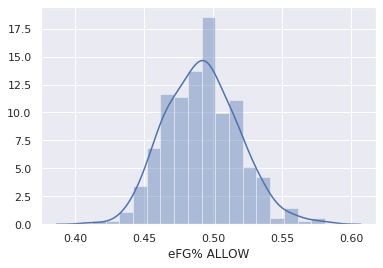

In [0]:
ax = sns.distplot(defense_df['eFG% ALLOW'])

Let's take a look at the standard deviations for the other metrics.

EFG_O


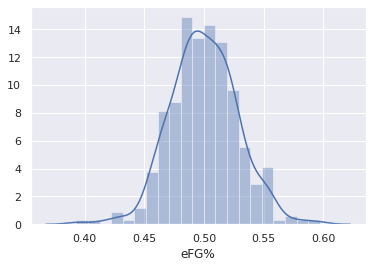

In [0]:
print('EFG_O')
ax = sns.distplot(shooting_df['eFG%'])

TO%


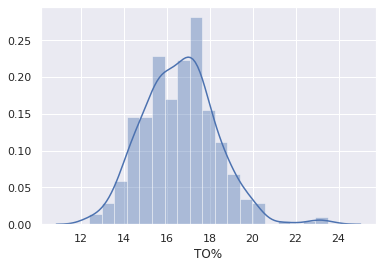

In [0]:
print('TO%')
ax = sns.distplot(assists_df['TO%'])

OFF_REB


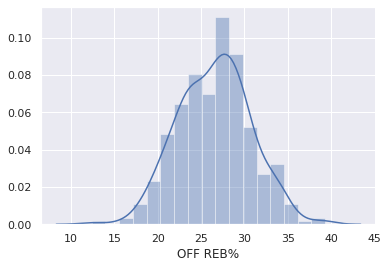

In [0]:
print('OFF_REB')
ax = sns.distplot(rebounding_df['OFF REB%'])

DEF_REB


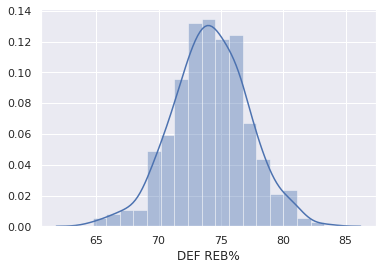

In [0]:
print('DEF_REB')
ax = sns.distplot(rebounding_df['DEF REB%'])

FTM/FGA


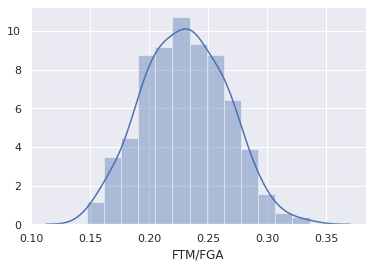

In [0]:
print('FTM/FGA')
ax = sns.distplot(shooting_df['FTM/FGA'])

3P_O


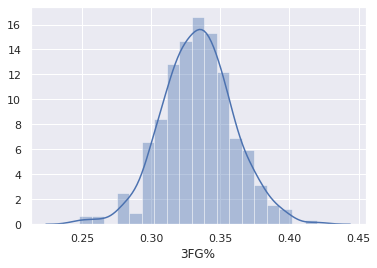

In [0]:
print('3P_O')
ax = sns.distplot(scoring_df['3FG%'])

3P_D


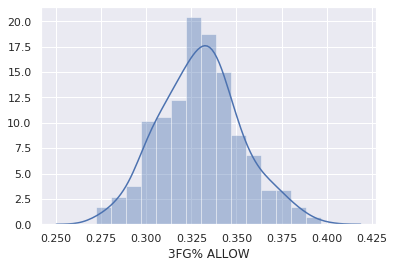

In [0]:
print('3P_D')
ax = sns.distplot(scoring_df['3FG% ALLOW'])

These visual references give the user a good perspective on just how significant some team's statistics are. For instance, user's should take note of just how rare it is to see a team with a 3FG% above .375 compared to a DEF_REB rate between 30 and 35.

For our purposes, these histograms are much more useful for analyzing the data than scatter plots, which failed to show any consistent correlations between each specific stat category.

**With all of this information at our disposal in tandem with the dashboard. User's will find that they have an ample number of tools to guide their decisions as they fill out their March Madness brackets.**